# Vader

In [1]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize,sent_tokenize
from tqdm import tqdm

In [30]:
vader_obj = SentimentIntensityAnalyzer()

## load data

In [31]:
import pandas as pd
file_path = '/Users/suqiulin/Downloads/160k.csv'
df=pd.read_csv(file_path)
df.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id
0,jaegarbong,"I have a feeling what you are asking for, but ...",2024-09-19 16:55:00,lnx7tpj,1fkpdzj,datascience,t5_2sptq
1,HammerPrice229,Have to agree (as someone trying to break in)....,2024-09-19 18:10:18,lnxmb0z,1fkpdzj,datascience,t5_2sptq
2,meloncholy,The PyData conferences usually have some good ...,2024-09-19 18:46:42,lnxt8w0,1fkpdzj,datascience,t5_2sptq
3,LyleLanleysMonorail,Coursera used to have a Practical Data Science...,2024-09-19 17:16:03,lnxbvt9,1fkpdzj,datascience,t5_2sptq
4,butyrospermumparkii,"On that note, [Spotify's engineering blog ](ht...",2024-09-19 18:13:40,lnxmy1o,1fkpdzj,datascience,t5_2sptq


In [32]:
df['body'] = df['body'].fillna("")  # Replace NaN with empty strings

# Get sentiment on sentencen level

In [33]:
def get_sentiment(text):
    if isinstance(text, str):
        return vader_obj.polarity_scores(text)
    else:
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}  # Return neutral for non-strings

In [50]:
def get_sentiment_label(compound_score):
    """Assign sentiment label based on VADER sentiment scores."""
    if compound_score > 0.05:
        return 'POSITIVE'
    elif compound_score < -0.05:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

In [35]:
def truncate_to_max_length(text, max_length=512):
    # Ensure the input is a valid string
    if not isinstance(text, str):
        return ""  # Return an empty string for non-string inputs
    
    # Tokenize the input text into words
    words = word_tokenize(text)
    
    # Truncate the list of words to the maximum length (512 tokens/words)
    truncated_words = words[:max_length]
    
    # Join the truncated words back into a string
    truncated_text = ' '.join(truncated_words)
    
    return truncated_text

In [51]:
# List to store the results
results = []

# Iterate through the dataframe
for index, row in tqdm(df.iterrows(), total=len(df), ncols=100):
    review = row['body']
    subreddit = row['subreddit']
    created_utc = row['created_utc']

    # Sentence tokenization
    for sentence in sent_tokenize(review):
        truncated_sentence = truncate_to_max_length(sentence, max_length=512)

        # Get sentiment for the sentence using Vader
        sentiment_scores = vader_obj.polarity_scores(truncated_sentence)
        compound = sentiment_scores['compound']
        sentiment_label = get_sentiment_label(compound)
        # Append results
        results.append({
            "subreddit": subreddit,
            "created_utc": created_utc,
            "sentence": truncated_sentence,
            "sentiment_scores": compound,
            "polarity": sentiment_label
        })

100%|█████████████████████████████████████████████████████| 161552/161552 [00:32<00:00, 4909.49it/s]


# Export and Visualize results

In [37]:
df_results = pd.DataFrame(results)
df_results.to_csv('/Users/suqiulin/Downloads/sentiment_by_vader_sentlevel.csv', index=False)

In [38]:
df_results.head()

,subreddit,created_utc,sentence,sentiment_scores,polarity
0,datascience,2024-09-19 16:55:00,"I have a feeling what you are asking for , but...",-0.3666,NEGATIVE
1,datascience,2024-09-19 16:55:00,however : Try blogs of major companies .,0.0000,NEUTRAL
2,datascience,2024-09-19 16:55:00,"I used to read Netflix Engineering blog , wher...",0.0000,NEUTRAL
3,datascience,2024-09-19 16:55:00,Being a gamer I also read Ubi Riot and Activis...,-0.8442,NEGATIVE
4,datascience,2024-09-19 16:55:00,And how is not finding insight a part of data ...,0.0000,NEUTRAL


In [39]:
df_results.shape

(438484, 5)

In [40]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [41]:
df_results['polarity'].value_counts()

polarity
NEUTRAL     173686
POSITIVE    161112
NEGATIVE    103686
Name: count, dtype: int64

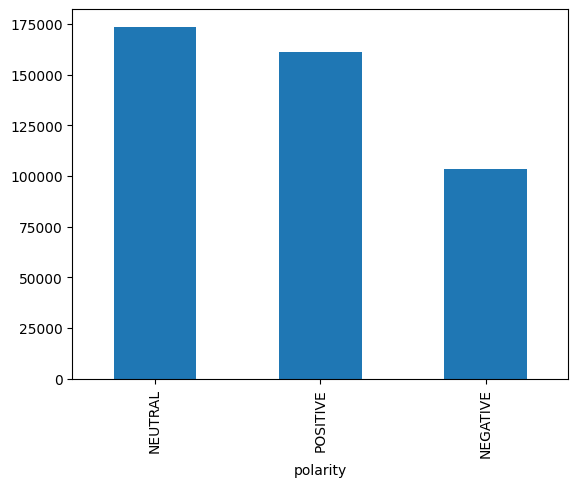

In [42]:
df_results['polarity'].value_counts().plot(kind='bar')
plt.show()

# Evaluation

In [45]:
import pandas as pd
file_path = '/Users/suqiulin/Desktop/plp_practice_proj/sentiment_analysis_sw/labelled_dataset_sentence_level_clean.csv'
df_eval=pd.read_csv(file_path)
df_eval['sentence'] = df_eval['sentence'].fillna("")  # Replace NaN with empty strings
df_eval.head()

,author,created_utc,id,submission,subreddit,subreddit_id,sentence,label
0,nodesign89,2024-09-08 18:09:29,lm5go3e,1fc2c3m,technology,t5_2qh16,So nothing new?,NEUTRAL
1,rangeo,2024-09-19 16:23:21,lnx1rfk,1fkg9y6,technology,t5_2qh16,Wayback I used to enjoy the random click to so...,POSITIVE
2,rangeo,2024-09-19 16:23:21,lnx1rfk,1fkg9y6,technology,t5_2qh16,"I have about 4 specific channels ( Rick beato,...",NEUTRAL
3,rangeo,2024-09-19 16:23:21,lnx1rfk,1fkg9y6,technology,t5_2qh16,I look at and spend 0 time looking at or for n...,NEUTRAL
4,OMG__Ponies,2024-09-18 00:54:21,lnnw1fj,1fjc1an,technology,t5_2qh16,Has it?,NEUTRAL


In [46]:
df_eval.shape

(8313, 8)

In [52]:
df_eval[['neg', 'neu', 'pos', 'compound']] = df_eval['sentence'].apply(get_sentiment).apply(pd.Series)
df_eval['predicted_polarity'] = df_eval['compound'].apply(get_sentiment_label).apply(pd.Series)
df_eval.head()

,author,created_utc,id,submission,subreddit,subreddit_id,sentence,label,neg,neu,pos,compound,predicted_polarity
0,nodesign89,2024-09-08 18:09:29,lm5go3e,1fc2c3m,technology,t5_2qh16,So nothing new?,NEUTRAL,0.0,1.000,0.000,0.0000,NEUTRAL
1,rangeo,2024-09-19 16:23:21,lnx1rfk,1fkg9y6,technology,t5_2qh16,Wayback I used to enjoy the random click to so...,POSITIVE,0.0,0.688,0.312,0.7096,POSITIVE
2,rangeo,2024-09-19 16:23:21,lnx1rfk,1fkg9y6,technology,t5_2qh16,"I have about 4 specific channels ( Rick beato,...",NEUTRAL,0.0,1.000,0.000,0.0000,NEUTRAL
3,rangeo,2024-09-19 16:23:21,lnx1rfk,1fkg9y6,technology,t5_2qh16,I look at and spend 0 time looking at or for n...,NEUTRAL,0.0,1.000,0.000,0.0000,NEUTRAL
4,OMG__Ponies,2024-09-18 00:54:21,lnnw1fj,1fjc1an,technology,t5_2qh16,Has it?,NEUTRAL,0.0,1.000,0.000,0.0000,NEUTRAL


In [53]:
!pip install seaborn
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [58]:
y_true = df_eval['label']
y_pred = df_eval['predicted_polarity']
cm = confusion_matrix(y_true, y_pred, labels=['POSITIVE', 'NEGATIVE', 'NEUTRAL'])

# Compute accuracy
true_positives = cm.diagonal()
total_actual = cm.sum(axis=1)

# Calculate per-class accuracy
accuracy_per_class = true_positives / total_actual
accuracy_pos, accuracy_neg, accuracy_neu = accuracy_per_class


# Compute recall (per class average)
recall = recall_score(y_true, y_pred, average=None, labels=['POSITIVE', 'NEGATIVE', 'NEUTRAL'])

# Compute F1 Score
f1_scores = f1_score(y_true, y_pred, labels=['POSITIVE', 'NEGATIVE', 'NEUTRAL'], average=None)
f1_pos, f1_neg, f1_neu = f1_scores

# Type 1 Error (False Positive Rate) - per class
type_1_error = 1 - recall  # Since FPR = 1 - recall (when averaged across classes)

# Compute Type 2 Error (False Negative Rate)
# Type 2 error (FNR) is simply: 1 - recall per class
type_2_error = 1 - recall

# Output the results
print(f"Confusion Matrix:\n{cm}")
print("----------------------------------------")
print(f"Recall (per class): {recall}")
print(f"Type 1 Error (per class): {type_1_error}")
print(f"Type 2 Error (per class): {type_2_error}")

# Print accuracy for each class
print("----------------------------------------")
print(f"Accuracy for 'POSITIVE': {accuracy_pos}")
print(f"Accuracy for 'NEGATIVE': {accuracy_neg}")
print(f"Accuracy for 'NEUTRAL': {accuracy_neu}")

# Print F1 scores for each class
print("----------------------------------------")
print(f"F1 Score for 'POSITIVE': {f1_pos}")
print(f"F1 Score for 'NEGATIVE': {f1_neg}")
print(f"F1 Score for 'NEUTRAL': {f1_neu}")

Confusion Matrix:
[[ 907   96  334]
 [ 729 1202  673]
 [1404  659 2309]]
----------------------------------------
Recall (per class): [0.67838444 0.46159754 0.52813358]
Type 1 Error (per class): [0.32161556 0.53840246 0.47186642]
Type 2 Error (per class): [0.32161556 0.53840246 0.47186642]
----------------------------------------
Accuracy for 'POSITIVE': 0.6783844427823486
Accuracy for 'NEGATIVE': 0.46159754224270355
Accuracy for 'NEUTRAL': 0.5281335773101555
----------------------------------------
F1 Score for 'POSITIVE': 0.4144391135480923
F1 Score for 'NEGATIVE': 0.5270773953080464
F1 Score for 'NEUTRAL': 0.6006763787721123


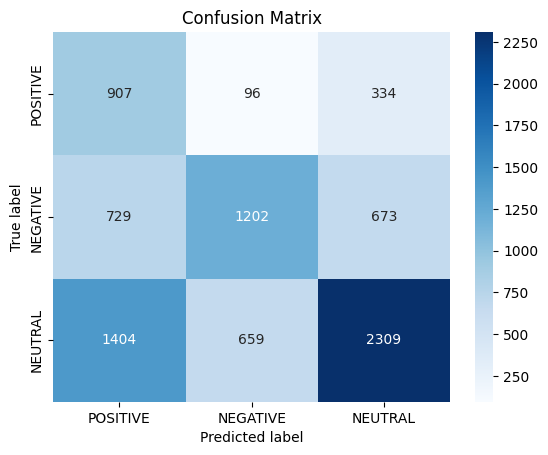

In [56]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['POSITIVE', 'NEGATIVE', 'NEUTRAL'], yticklabels=['POSITIVE', 'NEGATIVE', 'NEUTRAL'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()